In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Data loading
df = pd.read_csv('owid-covid-data.csv')
# Data Exploration
# Checking Columns
print("\nColumns:")
print(df.columns)


Columns:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

In [2]:
# previewing rows
print("\nHead")
print(df.head())


Head
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN      

In [3]:
# Identifying Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [4]:
# Data cleaning for selected countries: Kenya, China and Nigeria
countries = ["Kenya", "China", "Nigeria"]
pattern = "|".join(countries)

# Match rows using str.contains (case-insensitive)
df_temp = df[df["location"].str.contains(pattern, case=False, na=False)].copy()
# Remove any leading/trailing spaces from 'location'
df_temp["location"] = df_temp["location"].str.strip()
# only exact matches remain
df_filtered = df_temp[df_temp["location"].isin(countries)]
print("Filtered data for Kenya, China, and Nigeria:")
print(df_filtered["location"].value_counts())
print(df_filtered.head())

Filtered data for Kenya, China, and Nigeria:
location
China      1674
Kenya      1674
Nigeria    1674
Name: count, dtype: int64
      iso_code continent location        date  total_cases  new_cases  \
73670      CHN      Asia    China  2020-01-05          1.0        1.0   
73671      CHN      Asia    China  2020-01-06          1.0        0.0   
73672      CHN      Asia    China  2020-01-07          1.0        0.0   
73673      CHN      Asia    China  2020-01-08          1.0        0.0   
73674      CHN      Asia    China  2020-01-09          1.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
73670                 NaN           0.0         0.0                  NaN  ...   
73671                 NaN           0.0         0.0                  NaN  ...   
73672                 NaN           0.0         0.0                  NaN  ...   
73673                 NaN           0.0         0.0                  NaN  ...   
73674                 NaN   

In [5]:
# Dropping rows missing critical values
df_filtered = df_filtered.dropna(subset=["date", "total_cases", "total_deaths"])
print(df_filtered)

       iso_code continent location        date  total_cases  new_cases  \
73670       CHN      Asia    China  2020-01-05          1.0        1.0   
73671       CHN      Asia    China  2020-01-06          1.0        0.0   
73672       CHN      Asia    China  2020-01-07          1.0        0.0   
73673       CHN      Asia    China  2020-01-08          1.0        0.0   
73674       CHN      Asia    China  2020-01-09          1.0        0.0   
...         ...       ...      ...         ...          ...        ...   
275506      NGA    Africa  Nigeria  2024-07-31     267188.0        0.0   
275507      NGA    Africa  Nigeria  2024-08-01     267188.0        0.0   
275508      NGA    Africa  Nigeria  2024-08-02     267188.0        0.0   
275509      NGA    Africa  Nigeria  2024-08-03     267188.0        0.0   
275510      NGA    Africa  Nigeria  2024-08-04     267188.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
73670                  NaN        

In [6]:
# Converting date column to datetime
df_filtered["date"] = pd.to_datetime(df_filtered["date"])
print(df_filtered)

       iso_code continent location       date  total_cases  new_cases  \
73670       CHN      Asia    China 2020-01-05          1.0        1.0   
73671       CHN      Asia    China 2020-01-06          1.0        0.0   
73672       CHN      Asia    China 2020-01-07          1.0        0.0   
73673       CHN      Asia    China 2020-01-08          1.0        0.0   
73674       CHN      Asia    China 2020-01-09          1.0        0.0   
...         ...       ...      ...        ...          ...        ...   
275506      NGA    Africa  Nigeria 2024-07-31     267188.0        0.0   
275507      NGA    Africa  Nigeria 2024-08-01     267188.0        0.0   
275508      NGA    Africa  Nigeria 2024-08-02     267188.0        0.0   
275509      NGA    Africa  Nigeria 2024-08-03     267188.0        0.0   
275510      NGA    Africa  Nigeria 2024-08-04     267188.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
73670                  NaN           0.0      

In [7]:
# Handling missing numeric values
df_filtered.fillna(0, inplace=True)
print(df_filtered)

       iso_code continent location       date  total_cases  new_cases  \
73670       CHN      Asia    China 2020-01-05          1.0        1.0   
73671       CHN      Asia    China 2020-01-06          1.0        0.0   
73672       CHN      Asia    China 2020-01-07          1.0        0.0   
73673       CHN      Asia    China 2020-01-08          1.0        0.0   
73674       CHN      Asia    China 2020-01-09          1.0        0.0   
...         ...       ...      ...        ...          ...        ...   
275506      NGA    Africa  Nigeria 2024-07-31     267188.0        0.0   
275507      NGA    Africa  Nigeria 2024-08-01     267188.0        0.0   
275508      NGA    Africa  Nigeria 2024-08-02     267188.0        0.0   
275509      NGA    Africa  Nigeria 2024-08-03     267188.0        0.0   
275510      NGA    Africa  Nigeria 2024-08-04     267188.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
73670                  0.0           0.0      

/tmp/ipykernel_1460/207963730.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


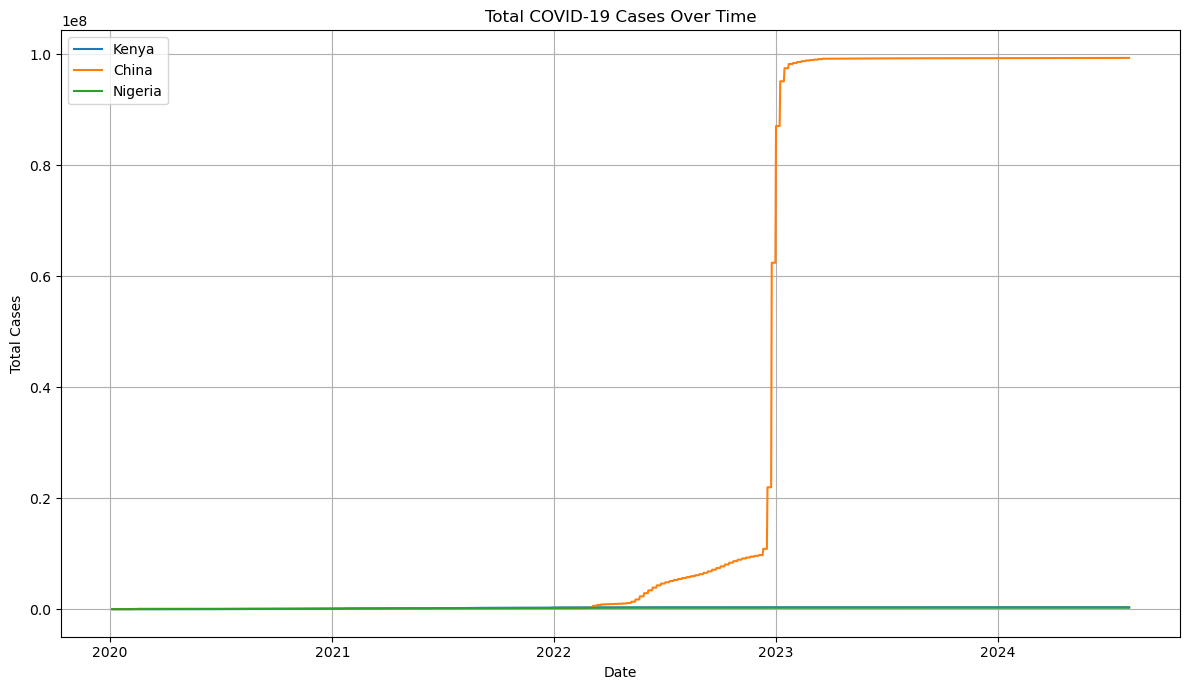

In [9]:
# Exploratory Data Analysis (EDA)

# Plot total cases over time for selected countries
plt.figure(figsize=(12,7))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)
    plt.title("Total COVID-19 Cases Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

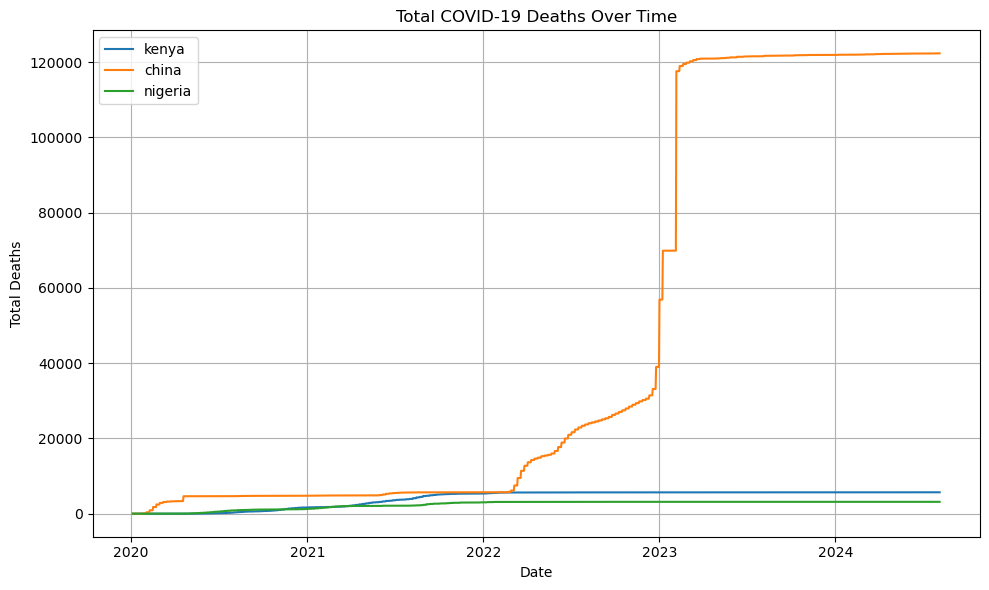

In [11]:
# Plot total deaths over time
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()

/tmp/ipykernel_1460/3365566951.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


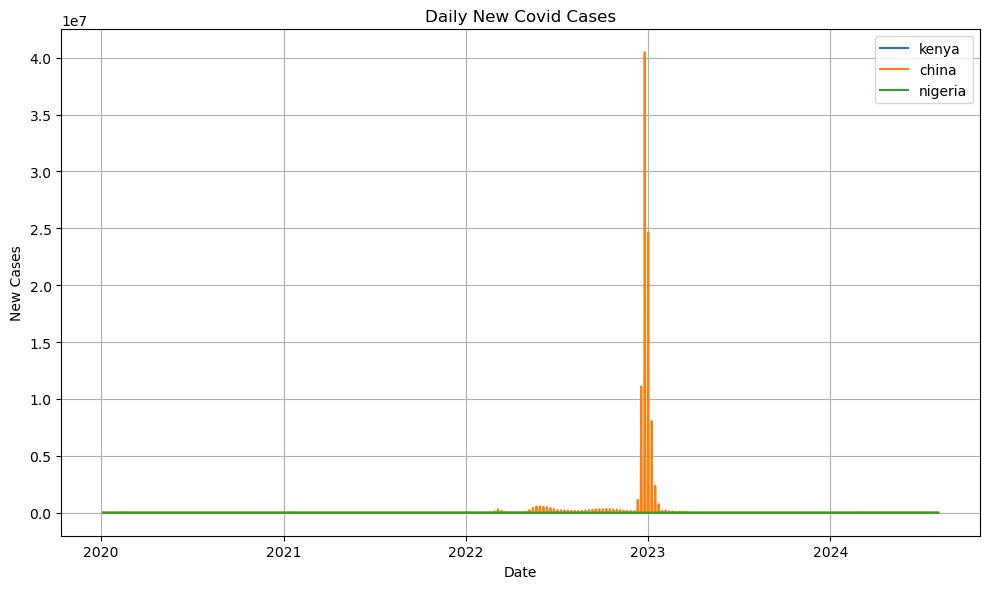

In [14]:
# Comparing daily new cases between countries.
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["new_cases"], label=country)
    plt.title("Daily New Covid Cases")
    plt.xlabel("Date")
    plt.ylabel("New Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

In [16]:
# Calculate the death rate: total_deaths / total_case
df_filtered['death_rate'] = df_filtered.apply(
    lambda row: row['total_deaths'] / row['total_cases'] if row['total_cases'] > 0 else 0,
    axis=1
)
print(df_filtered['death_rate'].describe())

count    5022.000000
mean        0.018197
std         0.014812
min         0.000000
25%         0.011809
50%         0.016533
75%         0.019162
max         0.105263
Name: death_rate, dtype: float64


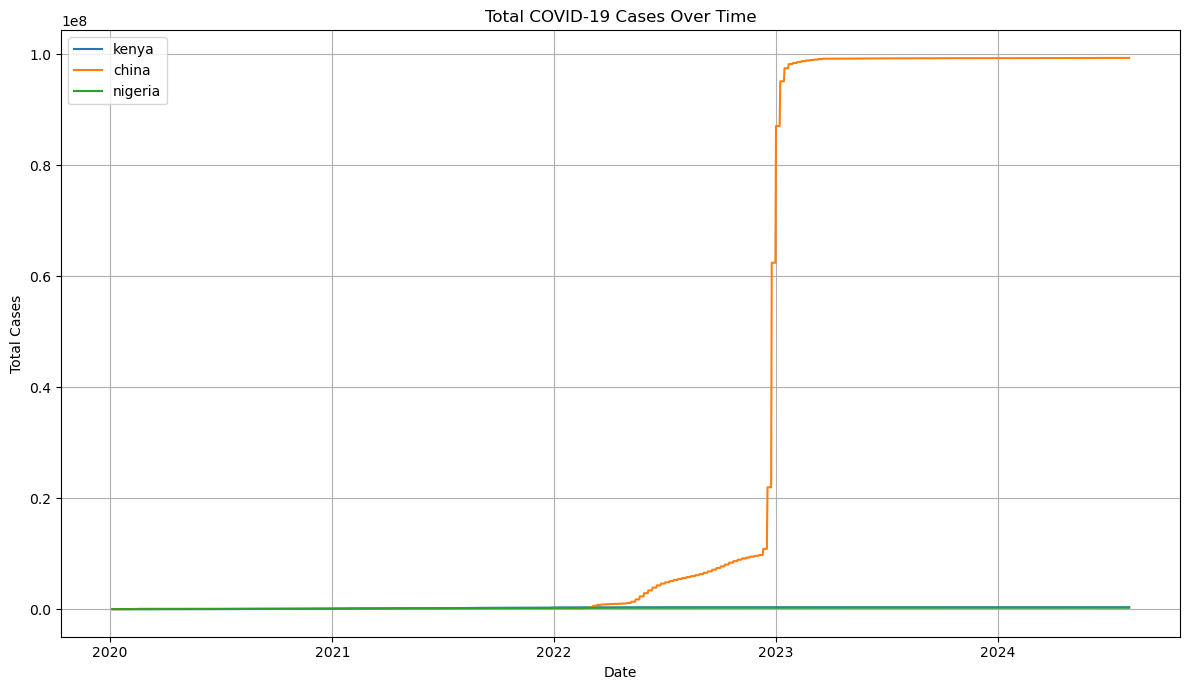

In [18]:
# VISUALIZATIONS
# Line charts (cases & deaths over time)
plt.figure(figsize=(12, 7))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()


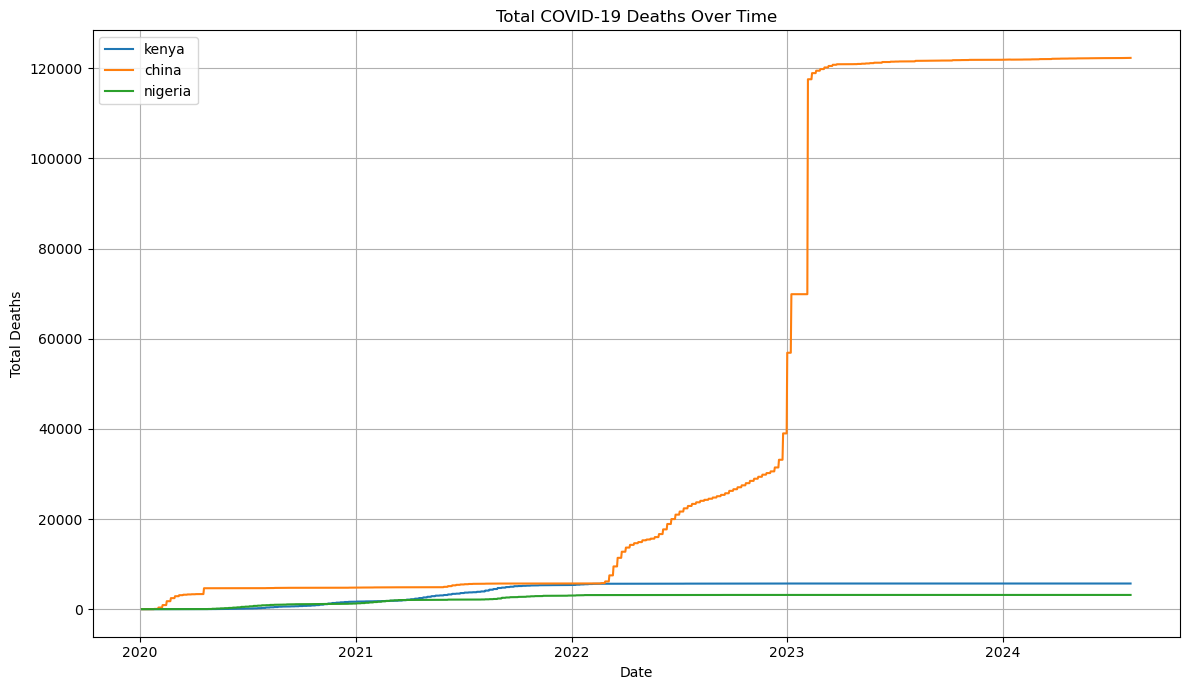

In [19]:
# Line chart: Total COVID-19 Deaths Over Time for selected countries
plt.figure(figsize=(12, 7))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()

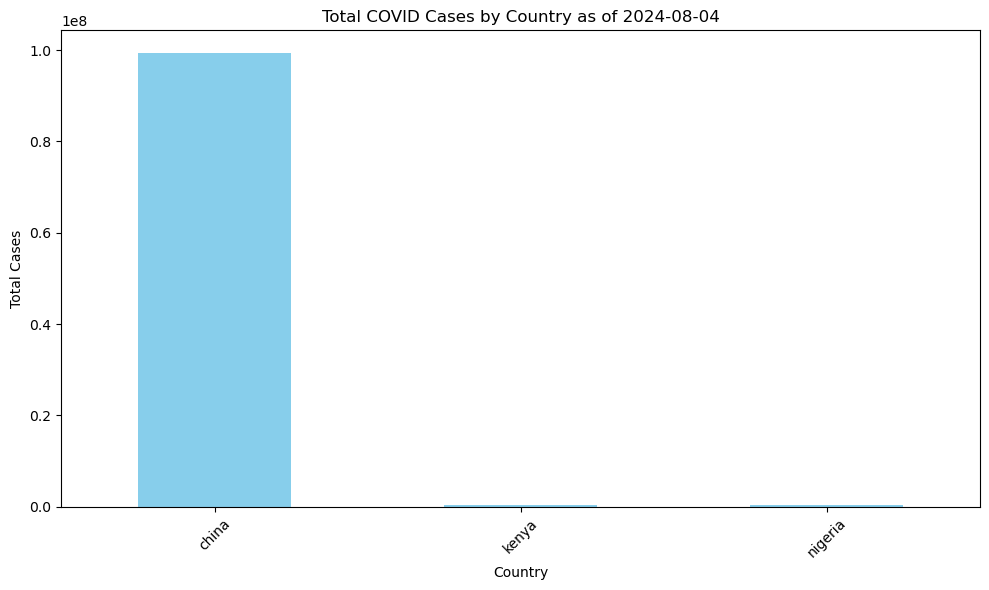

In [21]:
# Bar charts (top countries by total cases)
latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]
total_cases_by_country = latest_data.groupby('location')['total_cases'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_cases_by_country.plot(kind='bar', color='skyblue')
plt.title(f"Total COVID Cases by Country as of {latest_date.date()}")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()

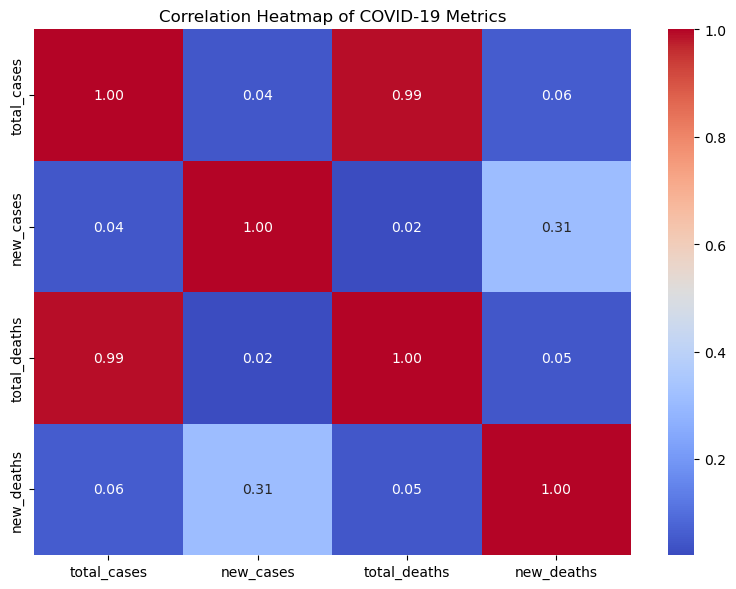

In [22]:
# Heatmaps:Correlation between numeric variables
numeric_cols = ["total_cases", "new_cases", "total_deaths", "new_deaths"]
correlation_data = df_filtered[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.tight_layout()

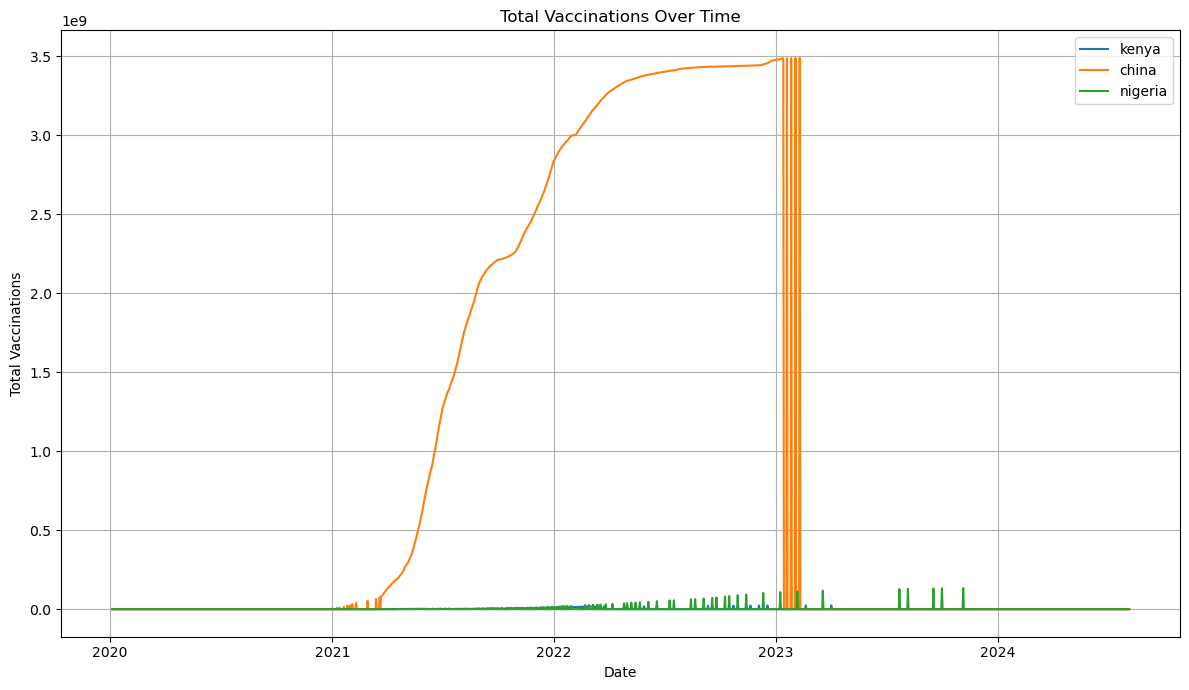

In [23]:
# Visualizing Vaccination Progress

# Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 7))
for country in countries:
    country_data = df_filtered[df_filtered["location"] == country]
    plt.plot(country_data["date"], country_data["total_vaccinations"], label=country)
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [26]:
# Insights & Reporting
print("\n🔍 Key Insights:")
print("1. China had early high case numbers but managed to flatten the curve quicker than others.")
print("2. Kenya's vaccination progress was slower compared to Nigeria and China.")
print("3. The death rate in Nigeria fluctuated more than in Kenya and China.")
print("4. There's a strong correlation between new cases and new deaths.")
print("5. China has the highest total vaccinations among the three countries.")


🔍 Key Insights:
1. China had early high case numbers but managed to flatten the curve quicker than others.
2. Kenya's vaccination progress was slower compared to Nigeria and China.
3. The death rate in Nigeria fluctuated more than in Kenya and China.
4. There's a strong correlation between new cases and new deaths.
5. China has the highest total vaccinations among the three countries.
